In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
#Creiamo il classificatore SVM
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=42)

In [2]:
from sklearn.model_selection import train_test_split

X,y= load_iris(return_X_y=True)
#Suddividiamo in Train (70%), temp(30%)
x_train,x_temp,y_train,y_temp = train_test_split(
    X,y,test_size=0.3,random_state=42,stratify=y
)

#Poi suddividiamo il restante 30% in Validation (20%) e Test(10%)
#Proporzione relativa: Validation = 2/3 di temp, Test = 1/3 di temp
x_valid,x_test, y_valid, y_test = train_test_split(
    x_temp,y_temp,test_size=0.33,random_state=42,stratify=y_temp
    )

In [3]:
#Addestra il modello
svm_classifier.fit(x_train,y_train)


SVC(random_state=42)

In [4]:
#Predizione modello
y_pred = svm_classifier.predict(x_test)
print("Prediction: ",y_pred)
print("Real Test ",y_test)

Prediction:  [0 0 2 0 1 1 1 1 0 2 2 2 1 0 2]
Real Test  [0 0 2 0 1 1 1 1 0 2 2 2 1 0 2]


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Valutazione performance
print("Accurancy: ", accuracy_score(y_test,y_pred))
print("\nClassification Report: ", classification_report(y_test,y_pred,target_names=load_iris().target_names))
print("\nConfusion Matrix:",confusion_matrix(y_test,y_pred))

Accurancy:  1.0

Classification Report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Confusion Matrix: [[5 0 0]
 [0 5 0]
 [0 0 5]]


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#Costruzione modello
model = Sequential([
    Dense(10, activation="relu", input_shape=(4,)),
    Dense(3, activation="softmax")
])
#Compilazione e addestramento
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
#Addestramento su dati Iris
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42)
model.fit(x_train,y_train,epochs=20,verbose=0)

#Valutazione
loss,acc = model.evaluate(x_test,y_test,verbose=0)
print("Accuratezza: ",acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuratezza:  0.28947368264198303


In [ ]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
#Caricamento e pre-elaborazione del dataset MNIST
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#Normalizzazione e reshape per la CNN
x_train = x_train.reshape(-1,28,28,1) / 255.0
x_test = x_test.reshape(-1,28,28,1) / 255.0

#Costruzione del Modello
model = Sequential([
                    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(64,kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(10,activation='softmax')
])
#Compilazione e addestramento
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,validation_split=0.1)

#Valutazione
loss,accuracy = model.evaluate(x_test,y_test)
print(f"\nAccuratezza della CNN su MNIST con TensorFlow/keras:{accuracy:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9008 - loss: 0.3183 - val_accuracy: 0.9870 - val_loss: 0.0461
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9858 - loss: 0.0456 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9903 - val_loss: 0.0367
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9903 - val_loss: 0.0362
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9913 - val_loss: 0.0343
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9884 - loss: 0.0334

Accuratezza della CNN su MNIST con TensorFlow/keras:0.9911


Accuratezza test set: 0.66

 Report di classificazione

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.50      0.91      0.65        11
           2       0.00      0.00      0.00        12

    accuracy                           0.66        38
   macro avg       0.44      0.64      0.52        38
weighted avg       0.47      0.66      0.55        38



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


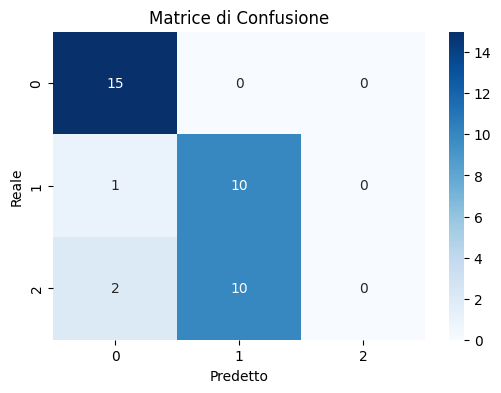

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
#Ripetiamo qualche istruzione (anche se non c'è bisogno ma al fine di non fare confusione)
X,y= load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train_t = torch.tensor(x_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t = torch.tensor(x_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)



#Modello
class SimpleNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(4,10)
    self.fc2 = nn.Linear(10,3)

  def forward(self, x):
    x = torch.relu(self.fc1(x)) #Combinazione lineare + funzione di attivazione
    x = self.fc2(x) #Solo combinazione lineare
    return x


model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

#Addestramento
for epoch in range(20):
  optimizer.zero_grad()
  out = model(X_train_t)
  loss = criterion(out, y_train_t)
  loss.backward()
  optimizer.step()


#Valutazine
model.eval()
with torch.no_grad():
  outputs = model(X_test_t)
  _, predicted = torch.max(outputs,1)
  accuracy = accuracy_score(y_test_t.numpy(), predicted.numpy())
  print(f"Accuratezza test set: {accuracy:.2f}")

#Matrice di confusione
print("\n Report di classificazione\n")
print(classification_report(y_test_t.numpy(),predicted.numpy()))
cm = confusion_matrix(y_test_t.numpy(), predicted.numpy())
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=range(3),yticklabels=range(3))
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()




In [ ]:
from scipy import linalg
import numpy as np
#Definiamo la matrice A dei coefficienti
A = np.array([[3,2,0],[1,-1,0],[0,5,1]])
#Definiamo il vettore b dei termini noti
b = np.array([2,4,-1])
#Risolviamo il sistema di equzioni Ax=b
x =linalg.solve(A,b)
print("La soluzione del sistema è: ")
print(x)
print("\nVerifica (A*x):")
print(A.dot(x))

La soluzione del sistema è: 
[ 2. -2.  9.]

Verifica (A*x):
[ 2.  4. -1.]


In [24]:
from  torchvision import datasets, transforms
from torch.utils.data import DataLoader



#1. Dati e trasformazioni
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
train_dataset = datasets.MNIST(root = './data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset , batch_size=64, shuffle=True)
test_dataset = datasets.MNIST(root = './data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset , batch_size=1000, shuffle=False)



class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2))
    self.layer2 = nn.Sequential(
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2))
    self.fc1 = nn.Linear(7*7*64,128)
    self.fc2 = nn.Linear(128,10)


  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0),-1)
    out = self.fc1(out)
    out = self.fc2(out)
    return out

model = ConvNet()
# Definizione di Loss, ottimizzatore e ciclo di addestramento
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

for epoch in range(5):
  for i, (images,labels) in enumerate(train_loader):
    outputs = model(images)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


#Valutazione
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
      outputs = model(images)
      _,predicted = torch.max(outputs.data,1)
      total+= labels.size(0)
      correct+=(predicted==labels).sum().item()
    print(f'Accuratezza della CNN su MNIST con PyTorch: {100 * correct / total:.2f}%')



Accuratezza della CNN su MNIST con PyTorch: 98.99%
